In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/ai-projects/forecast-studio

/content/drive/MyDrive/ai-projects/forecast-studio


In [5]:
import pandas as pd

results = pd.read_csv('reports/backtest_rolling_windows.csv')
results[['cutoff', 'mae', 'mae_naive1', 'mae_naive7', 'mae_naive28']]

,cutoff,mae,mae_naive1,mae_naive7,mae_naive28
0,2015-01-01,3.958175,7.915214,6.541857,6.867571
1,2015-04-01,4.849940,10.919000,8.686500,10.257357
2,2015-07-01,5.382212,12.227643,8.987929,9.373429
3,2015-10-01,4.711801,10.263643,8.090071,8.531500
4,2016-01-01,4.081154,8.370500,6.761500,6.933000
5,2016-04-01,5.058343,11.701714,9.107500,10.938857
6,2016-07-01,5.595021,13.082929,9.551071,9.814786
7,2016-10-01,4.915961,10.860357,8.427929,9.013143


In [7]:
results['improve_vs_naive7'] = results['mae_naive7'] - results['mae']
results['improve_vs_naive28'] = results['mae_naive28'] - results['mae']
results[['cutoff', 'mae', 'mae_naive1', 'mae_naive7', 'improve_vs_naive7', 'mae_naive28', 'improve_vs_naive28']]

,cutoff,mae,mae_naive1,mae_naive7,improve_vs_naive7,mae_naive28,improve_vs_naive28
0,2015-01-01,3.958175,7.915214,6.541857,2.583682,6.867571,2.909397
1,2015-04-01,4.849940,10.919000,8.686500,3.836560,10.257357,5.407417
2,2015-07-01,5.382212,12.227643,8.987929,3.605716,9.373429,3.991216
3,2015-10-01,4.711801,10.263643,8.090071,3.378271,8.531500,3.819699
4,2016-01-01,4.081154,8.370500,6.761500,2.680346,6.933000,2.851846
5,2016-04-01,5.058343,11.701714,9.107500,4.049157,10.938857,5.880514
6,2016-07-01,5.595021,13.082929,9.551071,3.956051,9.814786,4.219765
7,2016-10-01,4.915961,10.860357,8.427929,3.511967,9.013143,4.097182


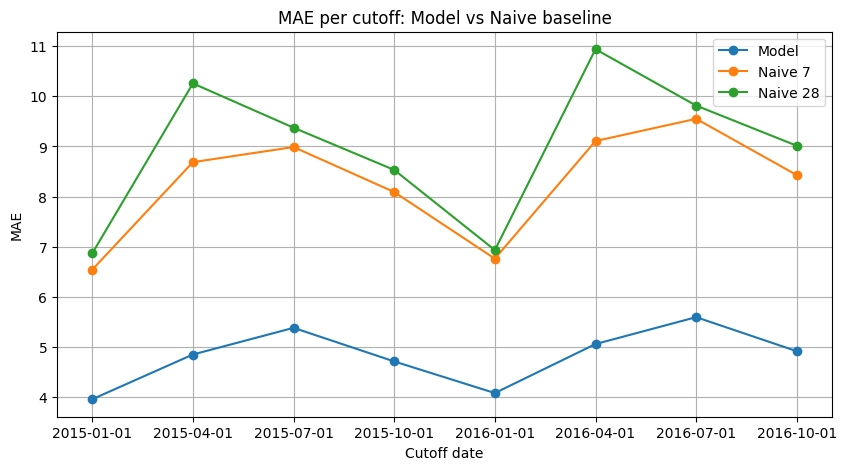

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(results['cutoff'], results['mae'], marker='o', label='Model')
plt.plot(results['cutoff'], results['mae_naive7'], marker='o', label='Naive 7')
plt.plot(results['cutoff'], results['mae_naive28'], marker='o', label='Naive 28')
plt.title('MAE per cutoff: Model vs Naive baseline')
plt.xlabel('Cutoff date')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()